In [205]:
###################################
## Goal: Develop a basic outline so they we can devide and concur different parts of the project

## Note: All functions will be explicitly defined within this file for ease. In actual implementation it will be stored in a Function.py
###################################

In [206]:
'''
Roadmap

1.Build out a portfolio A based on a traditional 60/40 asset allocation with bloomberg ticker LUATTRUU Index for the 40% bond allocation. 
The bloomberg terminal has monthly data starting 1973 and daily data starting in 1994. For the 60% equities, use bloomberg ticker SPXT Index with data starting in 1989 and 
SPX Index going back to 1973 (it would be nice but not necessary to find S&P 500 total return data prior to 1989).

2.Record:
•	Compound annualized growth
•	Annualized volatility
•	Annualized downside deviation
•	Max drawdown each year
•	Annualized Sharpe Ratio
•	Annualized Sortino Ratio
•	Annualized Omega Ratio
•	Annualized Calmar Ratio

3.  Backtest an alternative Portfolio B with size of this allocation adjustable and using data going back to 1972. 
Initially, the alternative strategy should be the XAU trade model outlined below, with the potential to test other alternative strategies in the future. 
Record monthly performance of Portfolio B over the course of historical backtest and record the same overall performance metrics used for Portfolio A
Use ticker XAU Curncy and SPX Index. The trade trigger is XAU bull trend aligned simultaneously with SPX/XAU ratio bear trend. 
The trade triggers and exits can be optimized based on any combination of smoothed moving average crosses. 5,20,63,252 using daily data. 4,13,52 using weekly closing price data. 
3 and 12 for monthly closing data.

Trade trigger examples: 
•	20 day < 252 day  for SPX/XAU and then on day 20 crosses > 252 for XAU, the model goes long XAU
•	4 week > 13 week for XAU and then when the 4 week crosses below the 13 week moving avg for SPX/XAU, the model goes long XAU 

4.  Combine Portfolio A with Portfolio B to create Portfolio C using an initial 10% allocation (if 60/40 portfolio size = $100 then alt strategy =$10)  
If initial findings do not reflect the XAU trade model being beneficial to adding resiliency to the initial portfolio, please reach out and we will provide other alternative strategy ideas.


'''

'\nRoadmap\n\n1.Build out a portfolio A based on a traditional 60/40 asset allocation with bloomberg ticker LUATTRUU Index for the 40% bond allocation. \nThe bloomberg terminal has monthly data starting 1973 and daily data starting in 1994. For the 60% equities, use bloomberg ticker SPXT Index with data starting in 1989 and \nSPX Index going back to 1973 (it would be nice but not necessary to find S&P 500 total return data prior to 1989).\n\n2.Record:\n•\tCompound annualized growth\n•\tAnnualized volatility\n•\tAnnualized downside deviation\n•\tMax drawdown each year\n•\tAnnualized Sharpe Ratio\n•\tAnnualized Sortino Ratio\n•\tAnnualized Omega Ratio\n•\tAnnualized Calmar Ratio\n\n3.  Backtest an alternative Portfolio B with size of this allocation adjustable and using data going back to 1972. \nInitially, the alternative strategy should be the XAU trade model outlined below, with the potential to test other alternative strategies in the future. \nRecord monthly performance of Portfolio

In [207]:
# Packages
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import import_ipynb
from tqdm import tqdm
import numpy as np
import pandas as pd
import quantstats as qs 
import sys
import os

# Check directory
print("Current Working Directory:", os.getcwd())

# Set pandas display precision to three decimal places
pd.options.display.float_format = '{:.4f}'.format

Current Working Directory: c:\Users\neoel\OneDrive - The University of Chicago\PL_Low_Tide_Capital_MGMT\Code


In [208]:
# Read in Data
data = pd.read_excel('equity_bond_gold.xlsx', na_values=['#N/A N/A'], sheet_name='equity_bond_gold_price')

# Rename the specified columns
data = data.rename(columns={
    'LUATTRUU Index': 'Bond',
    'SPXT Index': 'SP500_tr',
    'SPX Index': 'SP500',
    'XAU Curncy': 'Gold'
})

data = data[data['Dates'] >= '1994-03-01']

data

,Dates,Bond,SP500_tr,SP500,Gold
5498,1994-03-01,684.4300,568.3300,464.4400,378.7500
5499,1994-03-02,684.5600,569.0000,464.8100,378.1000
5500,1994-03-03,682.8400,566.8300,463.0100,377.8500
5501,1994-03-04,682.3600,569.0000,464.7400,377.2000
5502,1994-03-07,684.1500,571.7200,466.9100,376.4000
...,...,...,...,...,...
13497,2024-10-28,2307.4800,12751.2200,5823.5200,2742.4600
13498,2024-10-29,2308.7700,12771.8000,5832.9200,2774.7400
13499,2024-10-30,2307.2800,12729.7300,5813.6700,2787.6100
13500,2024-10-31,2308.1400,12493.7400,5705.4500,2743.9700


In [209]:
def calc_percent(df):
    """
    Calculate the percentage change for each column in the DataFrame, ensuring DateTime indexing.
    """
    # Set 'Dates' column as the index and convert to DateTime if not already
    if 'Dates' in df.columns:
        df['Dates'] = pd.to_datetime(df['Dates'])
        df.set_index('Dates', inplace=True)
    
    # Create a new DataFrame for the percentage changes, maintaining the DateTime index
    df_percent = pd.DataFrame(index=df.index)
    
    # Calculate the percentage change for each column and add it to the new DataFrame
    for col in df.columns:
        df_percent[col + '_pctchange'] = df[col].pct_change().fillna(0)
    
    return df_percent

In [210]:
# Calculate percentage changes for each column starting from the second column onward
returns = calc_percent(data)

# Add a weighted 'ports_pctchange' column
returns['ports_pctchange'] = 0.6 * returns['SP500_pctchange'] + 0.4 * returns['Bond_pctchange']

# Display the results
returns


,Bond_pctchange,SP500_tr_pctchange,SP500_pctchange,Gold_pctchange,ports_pctchange
Dates,,,,,
1994-03-01,0.0000,0.0000,0.0000,0.0000,0.0000
1994-03-02,0.0002,0.0012,0.0008,-0.0017,0.0006
1994-03-03,-0.0025,-0.0038,-0.0039,-0.0007,-0.0033
1994-03-04,-0.0007,0.0038,0.0037,-0.0017,0.0020
1994-03-07,0.0026,0.0048,0.0047,-0.0021,0.0039
...,...,...,...,...,...
2024-10-28,-0.0013,0.0027,0.0027,-0.0019,0.0011
2024-10-29,0.0006,0.0016,0.0016,0.0118,0.0012
2024-10-30,-0.0006,-0.0033,-0.0033,0.0046,-0.0022


In [211]:
#### Function 

import pandas as pd
import numpy as np

def calculate_max_drawdown(df, column_name):
    """
    Calculate the max drawdown for the entire period in a DataFrame with a DateTime index.
    
    Parameters:
    df : pandas DataFrame - A DataFrame with a DateTimeIndex and a specified column for returns.
    column_name : str - The name of the column to use for returns calculations.
    """
    # Ensure the index is a DateTimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame index must be a DateTimeIndex.")
    
    cumulative_returns = (1 + df[column_name]).cumprod()  # Calculate cumulative returns
    peak = cumulative_returns.cummax()  # Calculate rolling maximum of cumulative returns
    drawdown = (cumulative_returns - peak) / peak  # Calculate drawdown
    max_drawdown = drawdown.min()  # Return the maximum drawdown
    
    return max_drawdown


def calculate_performance_metrics(df, column_name, annualization_factor):
    """
    Calculate various performance metrics for a given DataFrame with a DateTimeIndex.
    
    Parameters:
    df : pandas DataFrame - The DataFrame with a DateTimeIndex and a specified returns column.
    column_name : str - The name of the column to use for returns calculations.
    annualization_factor : int - The factor to annualize the data (252 for daily returns, 12 for monthly).
    """
    # Ensure the specified column exists
    if column_name not in df.columns:
        raise ValueError(f"The DataFrame must contain a '{column_name}' column.")

    # Drop missing values in returns
    returns = df[column_name].dropna()

    # Annualized returns (Compound Annualized Growth Rate - CAGR)
    cumulative_return = (1 + returns).prod() - 1
    years = len(returns) / annualization_factor
    cagr = (1 + cumulative_return) ** (1 / years) - 1
    
    # Annualized volatility
    annualized_volatility = returns.std() * np.sqrt(annualization_factor)

    # Annualized downside deviation (only considers negative returns)
    downside_returns = returns[returns < 0]
    annualized_downside_deviation = downside_returns.std() * np.sqrt(annualization_factor)

    # Annualized Sharpe Ratio (Assuming risk-free rate is zero)
    sharpe_ratio = cagr / annualized_volatility

    # Annualized Sortino Ratio
    sortino_ratio = cagr / annualized_downside_deviation

    # Annualized Omega Ratio (Using threshold of 0 for the numerator)
    positive_excess_returns = returns[returns > 0].sum()
    negative_excess_returns = abs(returns[returns < 0].sum())
    omega_ratio = positive_excess_returns / negative_excess_returns

    # Max drawdown for the full period
    max_drawdown = calculate_max_drawdown(df, column_name)

    # Annualized Calmar Ratio
    calmar_ratio = cagr / abs(max_drawdown)

    # Prepare results as a DataFrame
    metrics_df = pd.DataFrame({
        'Metric': ['CAGR', 'Annualized Volatility', 'Annualized Downside Deviation', 'Sharpe Ratio', 
                   'Sortino Ratio', 'Omega Ratio', 'Max Drawdown', 'Calmar Ratio'],
        'Value': [cagr, annualized_volatility, annualized_downside_deviation, sharpe_ratio, 
                  sortino_ratio, omega_ratio, max_drawdown, calmar_ratio]
    })

    return metrics_df

# Example usage
base_port_performance = calculate_performance_metrics(returns, column_name='ports_pctchange', annualization_factor=252)
base_port_performance


,Metric,Value
0,CAGR,0.0698
1,Annualized Volatility,0.1078
2,Annualized Downside Deviation,0.0841
3,Sharpe Ratio,0.6472
4,Sortino Ratio,0.8297
5,Omega Ratio,1.1370
6,Max Drawdown,-0.3407
7,Calmar Ratio,0.2049


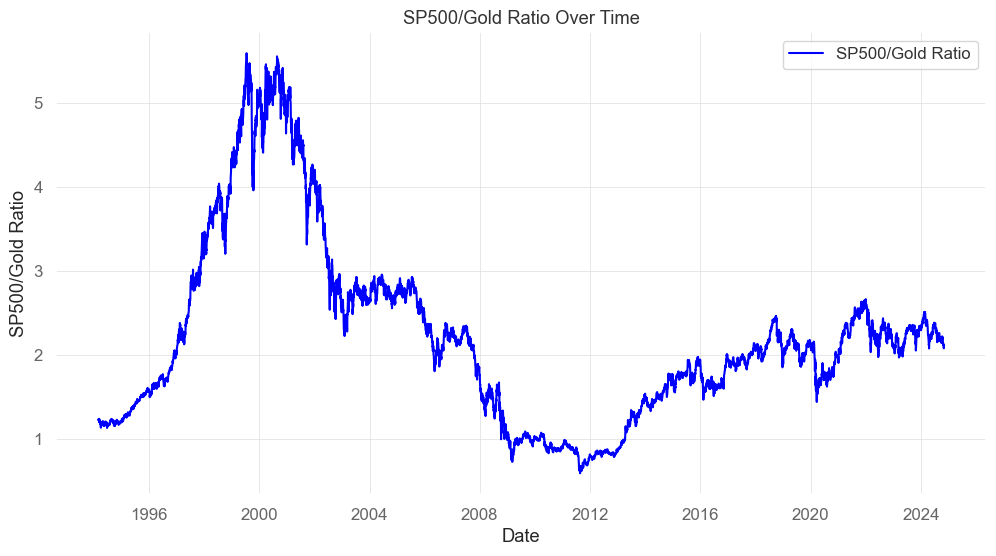

In [212]:
# Calculate the ratio of SP500 to Gold
data['SP500_Gold_Ratio'] = data['SP500'] / data['Gold']
data

# Plotting the SP500_Gold_Ratio
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SP500_Gold_Ratio'], label='SP500/Gold Ratio', color='blue')
plt.title('SP500/Gold Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('SP500/Gold Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [213]:
def generate_signal(price_series, short1, long1, short2, long2):
    """
    Generates a trading signal based on two EMA crossover strategies.

    Args:
        price_series (Series): The price series to analyze.
        short1 (int): Short-term EMA period for the first strategy.
        long1 (int): Long-term EMA period for the first strategy.
        short2 (int): Short-term EMA period for the second strategy.
        long2 (int): Long-term EMA period for the second strategy.

    Returns:
        DataFrame: DataFrame containing the 'signal' column.
    """
    df = pd.DataFrame(price_series)

    # Calculate EMAs for both strategies
    df['long_ma1'] = price_series.ewm(span=long1, adjust=False).mean()
    df['short_ma1'] = price_series.ewm(span=short1, adjust=False).mean()
    df['long_ma2'] = price_series.ewm(span=long2, adjust=False).mean()
    df['short_ma2'] = price_series.ewm(span=short2, adjust=False).mean()

    # Generate signals: 1 if short_ma > long_ma, 0 otherwise
    df['signal1'] = np.where(df['short_ma1'] > df['long_ma1'], 1, 0)
    df['signal2'] = np.where(df['short_ma2'] > df['long_ma2'], 1, 0)

    # Signal = 1 if both signals are active, 0.5 if only one is active, and 0 if neither are active
    df['signal'] = np.where((df['signal1'] == 1) & (df['signal2'] == 1), 1, 
                        np.where(df['signal1'] != df['signal2'], 0.5, 0))

    # Keep only the 'signal' column
    return df[['signal']]

signal_df = generate_signal(data['Gold'], 20, 63, 50, 200)

signal_tally = signal_df['signal'].value_counts()
print(signal_tally)

signal
1.0000    3878
0.0000    2215
0.5000    1911
Name: count, dtype: int64


In [214]:
def calculate_position_returns(signal_df, returns_series):
    """
    Calculates the returns based on holding positions according to signals, with a one-day delay.
    
    Args:
        signal_df (DataFrame): DataFrame containing the 'signal' column indicating the position (1, 0.5, or 0).
        returns_series (Series): Series of daily returns corresponding to the price series.
    
    Returns:
        DataFrame: DataFrame containing the shifted signals and the resulting position returns.
    """
    # Shift the signal by one day to implement the one-day delay
    signal_df['shifted_signal'] = signal_df['signal'].shift(1)
    
    # Calculate returns by multiplying returns with the delayed signal
    signal_df['position_returns'] = returns_series * signal_df['shifted_signal']
    
    # Optional: Calculate cumulative returns for a summary view
    signal_df['cumulative_returns'] = (1 + signal_df['position_returns']).cumprod() - 1
    
    return signal_df[['shifted_signal', 'position_returns', 'cumulative_returns']]



# Creating the Gold Strategy Based on Bullish stances on Gold
gold_strategy = calculate_position_returns(signal_df, returns['Gold_pctchange'])
gold_strategy

,shifted_signal,position_returns,cumulative_returns
Dates,,,
1994-03-01,NaN,NaN,NaN
1994-03-02,0.0000,-0.0000,0.0000
1994-03-03,0.0000,-0.0000,0.0000
1994-03-04,0.0000,-0.0000,0.0000
1994-03-07,0.0000,-0.0000,0.0000
...,...,...,...
2024-10-28,1.0000,-0.0019,3.1155
2024-10-29,1.0000,0.0118,3.1639
2024-10-30,1.0000,0.0046,3.1832


In [215]:
gold_strategy_performance = calculate_performance_metrics(gold_strategy, column_name='position_returns', annualization_factor=252)

leveraged_strategy = pd.DataFrame(
    returns['ports_pctchange'] + 0.1 * gold_strategy['position_returns'], 
    columns=['Returns']
)

leveraged_strategy_performance = calculate_performance_metrics(leveraged_strategy, column_name='Returns', annualization_factor=252)

# Combine the three DataFrames side-by-side with labeled columns
combined_performance = pd.concat(
    [base_port_performance, gold_strategy_performance, leveraged_strategy_performance],
    axis=1,
    keys=['Base Portfolio', 'Gold Strategy', 'Leveraged Strategy']
)

# Display the combined DataFrame
combined_performance

Base Portfolio                          Gold Strategy  \
                          Metric   Value                         Metric   
0                           CAGR  0.0698                           CAGR   
1          Annualized Volatility  0.1078          Annualized Volatility   
2  Annualized Downside Deviation  0.0841  Annualized Downside Deviation   
3                   Sharpe Ratio  0.6472                   Sharpe Ratio   
4                  Sortino Ratio  0.8297                  Sortino Ratio   
5                    Omega Ratio  1.1370                    Omega Ratio   
6                   Max Drawdown -0.3407                   Max Drawdown   
7                   Calmar Ratio  0.2049                   Calmar Ratio   

                      Leveraged Strategy          
    Value                         Metric   Value  
0  0.0455                           CAGR  0.0752  
1  0.1190          Annualized Volatility  0.1086  
2  0.1083  Annualized Downside Deviation  0.0843  
3  0.3822                   Sharpe Ratio  0.6925  
4  0.4199                  Sortino Ratio  0.8928  
5  1.0987                    Omega Ratio  1.1449  
6 -0.2944                   Max Drawdown -0.3362  
7  0.1545                   Calmar Ratio  0.2238

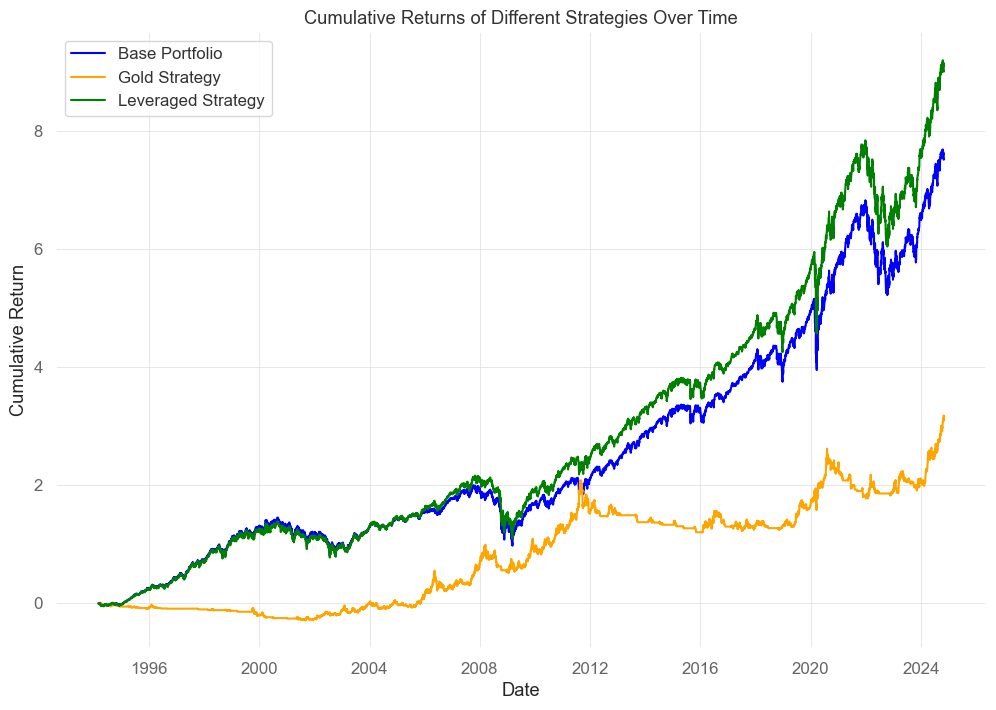

In [216]:
# Creating a cumulative_returns DataFrame that consolidates cumulative returns for each strategy
cumulative_returns = pd.DataFrame({
    'Base Portfolio': (1 + returns['ports_pctchange']).cumprod() - 1,
    'Gold Strategy': (1 + gold_strategy['position_returns']).cumprod() - 1,
    'Leveraged Strategy': (1 + leveraged_strategy['Returns']).cumprod() - 1
})

# Plotting the cumulative returns
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns.index, cumulative_returns['Base Portfolio'], label='Base Portfolio', color='blue')
plt.plot(cumulative_returns.index, cumulative_returns['Gold Strategy'], label='Gold Strategy', color='orange')
plt.plot(cumulative_returns.index, cumulative_returns['Leveraged Strategy'], label='Leveraged Strategy', color='green')

# Label and style the plot
plt.title('Cumulative Returns of Different Strategies Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()